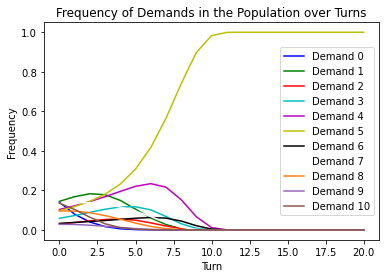

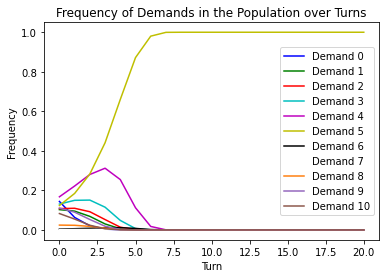

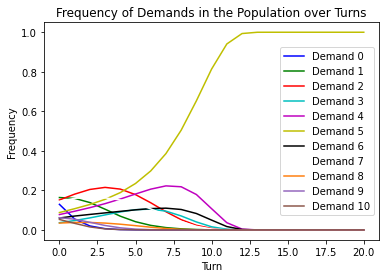

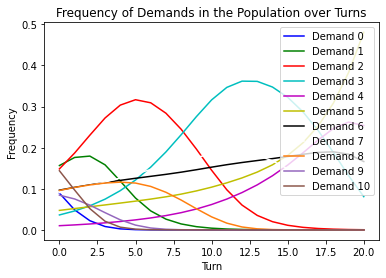

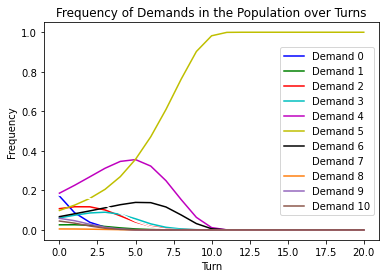

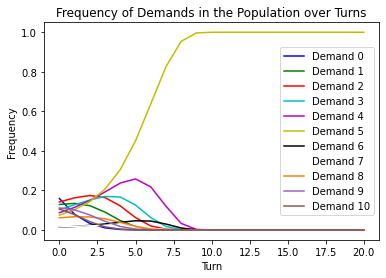

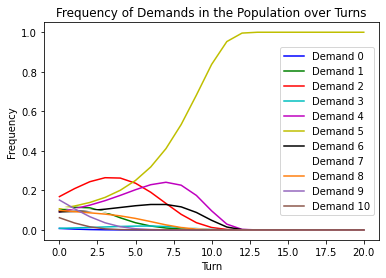

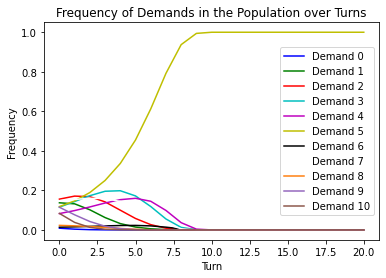

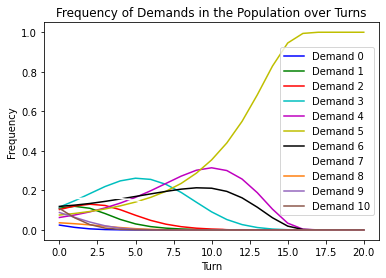

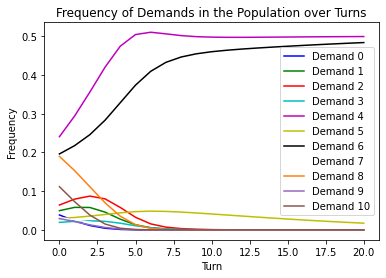

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def replicator_dynamics(frequencies):
    """ Runs a round of the game where people get their
    demand if the sum of two players is less than or equal
    to 10. Otherwise they'll receive zero. Then each player
    chooses one person from the population at random and will
    adopt their strategy if they had a greater payoff than them.
    """
    # Calculate the payoffs
    payoffs = np.zeros((11, 11))
    for i in range(11):
        for j in range(11):
            if i + j <= 10:
                payoffs[i][j] = i
            else:
                payoffs[i][j] += 0
    
    # Calculate the fitnesses
    fitnesses = payoffs / np.sum(payoffs)
    
    # Calculate the new frequencies
    new_frequencies = np.zeros(11)
    for i1 in range(11):
        for j1 in range(11):
            for i2 in range(11):
                for j2 in range(11):
                    if payoffs[i1][j1] >= payoffs[i2][j2]:
                        new_frequencies[i1] += frequencies[i1] * frequencies[j1] * frequencies[i2] * frequencies[j2]
                    else:
                        new_frequencies[i2] += frequencies[i1] * frequencies[j1] * frequencies[i2] * frequencies[j2]

    return new_frequencies / np.sum(new_frequencies)

def plot_strategy_frequencies(frequencies_over_turns):
    strategies = np.arange(11)
    turns = len(frequencies_over_turns)
    # Assign different color to each strategy
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'tab:orange', 'tab:purple', 'tab:brown']
    strategies_over_turns = np.array(frequencies_over_turns).T
    
    for i in range(len(strategies_over_turns)):
        plt.plot(np.arange(turns), strategies_over_turns[i], color=colors[i], label=f"Demand {i}")
    
    plt.xlabel('Turn')
    plt.ylabel('Frequency')
    plt.title('Frequency of Demands in the Population over Turns')
    plt.legend()
    plt.show()

# Define the initial frequency distribution by randomly assigning
# a frequency to each strategy
num_runs = 10

for i in range(num_runs):
    # Generate initial frequencies
    initial_frequencies = np.random.random(11)
    initial_frequencies /= np.sum(initial_frequencies)

    # Simulate the replicator dynamics over 20 turns
    turns = 20
    frequencies_over_turns = [initial_frequencies]

    for j in range(turns):
        frequencies = frequencies_over_turns[j]
        new_frequencies = replicator_dynamics(frequencies)
        frequencies_over_turns.append(new_frequencies)

    # Plot the frequencies over turns
    plot_strategy_frequencies(frequencies_over_turns)
    plt.show()